In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, r2_score

In [ ]:
df = pd.read_csv("/content/sample_data/Social_Network_Ads.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
X = df[["Age", "EstimatedSalary"]]
y = df[["Purchased"]]

NameError: name 'y' is not defined

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
lr = LogisticRegression(C = 1.0, solver = "liblinear", multi_class = 'ovr')
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
def plot(X, y,mset):
  p = ['Not Purchased', 'Purchased']
  X1, X2 = np.meshgrid(np.arange(start = X[:,0].min()-1, stop = X[:,0].max()+1, step = 0.01),
                       np.arange(start = X[:,1].min()-1, stop = X[:,1].max()+1, step = 0.01))

  plt.figure(figsize = (8,6))
  plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('#F1674F', '#BEDDB7')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(set(y)):
    plt.scatter(X[y == j, 0], X[y == j, 1],
                    c = ['#F84C51', '#23807A'][i], label = p[j])
    plt.title('Logistic Regression ('+mset+')')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
  plt.show()

In [ ]:
y_pred = lr.predict(X_test)

IndexError: boolean index did not match indexed array along axis 0; size of axis is 320 but size of corresponding boolean axis is 80

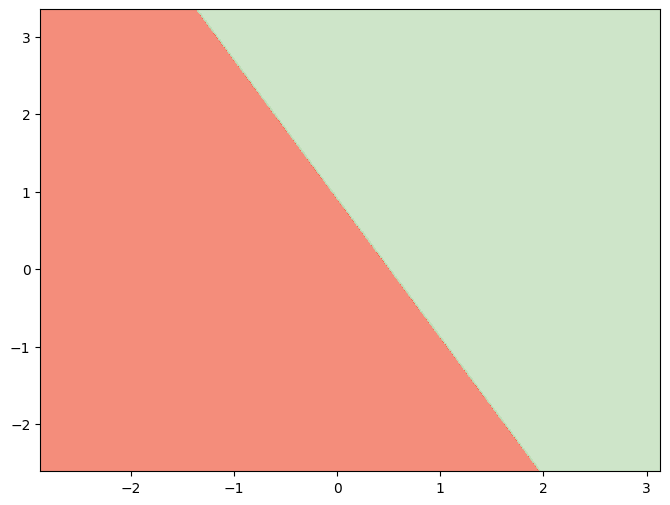

In [ ]:
y_pred = lr.predict(X_test)
plt.show(plot(X_train, y_pred, 'Training set'))


In [ ]:
y_pred = lr.predict(X_test)
plt.show(X_train, y_train.values.ravel(), 'Training set')


TypeError: show() takes from 0 to 2 positional arguments but 3 were given

In [ ]:
print("Accuracy score", accuracy_score(y_pred, y_test))

In [ ]:
print("R2 score", r2_score(y_pred, y_test))

In [ ]:
print(lr.coef_)

In [ ]:
print(lr.intercept_)